# Librerias utilizadas

In [84]:
jupyter = True

In [85]:
if jupyter:
    import wget
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import toeplitz
from IPython.display import clear_output
from os import path
from scipy.ndimage.interpolation import shift
from matplotlib.mlab import psd

In [86]:
# Collab
if not jupyter:
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true
    clear_output()

# Jupyter
if jupyter:
    cont_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true'
    if not path.exists('Contaminated_Data.mat'):
       cont_data_file = wget.download(cont_data_url)
    else:
       print('Already Downloaded File')
       cont_data_file = 'Contaminated_Data.mat'
    pure_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true'
    if not path.exists('Pure_Data.mat'):
       pure_data_file = wget.download(pure_data_url)
    else:
       print('Already Downloaded File')
       pure_data_file = 'Pure_Data.mat'
    heog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true'
    if not path.exists('HEOG.mat'):
       heog_file = wget.download(heog_url)
    else:
       print('Already Downloaded File')
       heog_file = 'HEOG.mat'
    veog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true'
    if not path.exists('VEOG.mat'):
       veog_file = wget.download(veog_url)
    else:
       print('Already Downloaded File')
       veog_file = 'VEOG.mat'

Already Downloaded File
Already Downloaded File
Already Downloaded File
Already Downloaded File


In [87]:
def RemoveKeys(dict_):
    new_dict = dict_.copy()
    new_dict.pop('__header__')
    new_dict.pop('__version__')
    new_dict.pop('__globals__')
    return  new_dict

def AddPlot(signal, n_rows, n_cols, index, title):
    plt.subplot(n_rows,n_cols,index)
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)

dict_keys(['sim1_resampled', 'sim2_resampled', 'sim3_resampled', 'sim4_resampled', 'sim5_resampled', 'sim6_resampled', 'sim7_resampled', 'sim8_resampled', 'sim9_resampled', 'sim10_resampled', 'sim11_resampled', 'sim12_resampled', 'sim13_resampled', 'sim14_resampled', 'sim15_resampled', 'sim16_resampled', 'sim17_resampled', 'sim18_resampled', 'sim19_resampled', 'sim20_resampled', 'sim21_resampled', 'sim22_resampled', 'sim23_resampled', 'sim24_resampled', 'sim25_resampled', 'sim26_resampled', 'sim27_resampled', 'sim28_resampled', 'sim29_resampled', 'sim30_resampled', 'sim31_resampled', 'sim32_resampled', 'sim33_resampled', 'sim34_resampled', 'sim35_resampled', 'sim36_resampled', 'sim37_resampled', 'sim38_resampled', 'sim39_resampled', 'sim40_resampled', 'sim41_resampled', 'sim42_resampled', 'sim43_resampled', 'sim44_resampled', 'sim45_resampled', 'sim46_resampled', 'sim47_resampled', 'sim48_resampled', 'sim49_resampled', 'sim50_resampled', 'sim51_resampled', 'sim52_resampled', 'sim53_res

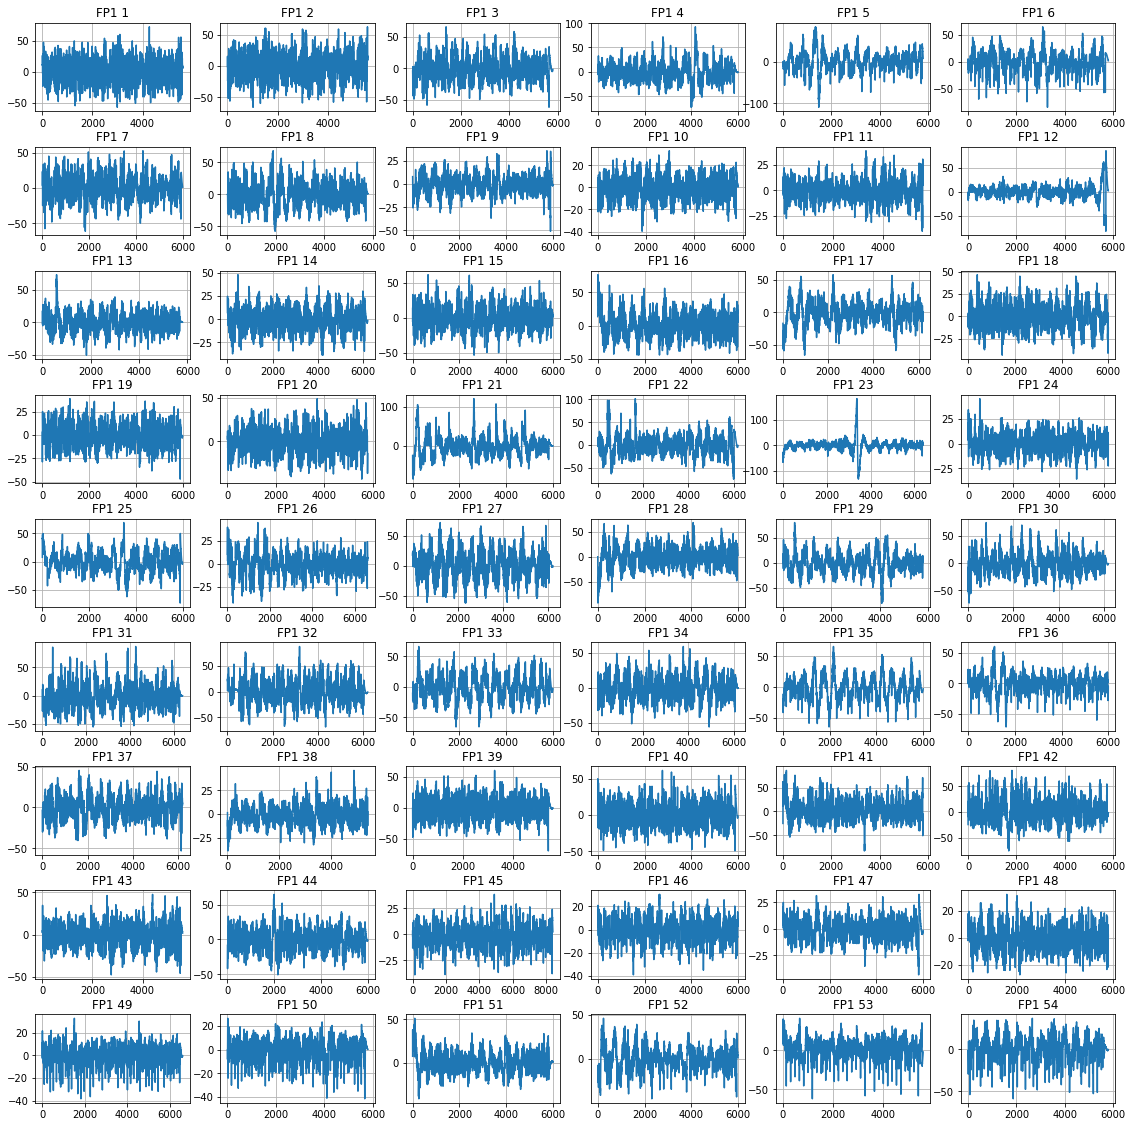

In [88]:
if jupyter:
    clean_dict = loadmat(pure_data_file)
else:
    clean_dict = loadmat("Pure_Data.mat?raw=true") 

new_clean = RemoveKeys(clean_dict)
print(new_clean.keys())
clean_list = [new_clean[eeg] for eeg in new_clean.keys()]
c_shapes = [ clean_list[i].shape[1] for i in range(0,len(clean_list))]
print("len clean_list: " + str( len(clean_list) ) )
print("numero de canales eeg por elemento de la lista: "+str( clean_list[0].shape[0] ))
print("len de clean mas larga: "+str( np.amax(c_shapes) ))
print("len de clean mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(clean_list)):
    AddPlot(clean_list[i][0], 9, 6, i+1, "FP1 "+str(i+1))
plt.show()

dict_keys(['veog_1', 'veog_2', 'veog_3', 'veog_4', 'veog_5', 'veog_6', 'veog_7', 'veog_8', 'veog_9', 'veog_10', 'veog_11', 'veog_12', 'veog_13', 'veog_14', 'veog_15', 'veog_16', 'veog_17', 'veog_18', 'veog_19', 'veog_20', 'veog_21', 'veog_22', 'veog_23', 'veog_24', 'veog_25', 'veog_26', 'veog_27', 'veog_28', 'veog_29', 'veog_30', 'veog_31', 'veog_32', 'veog_33', 'veog_34', 'veog_35', 'veog_36', 'veog_37', 'veog_38', 'veog_39', 'veog_40', 'veog_41', 'veog_42', 'veog_43', 'veog_44', 'veog_45', 'veog_46', 'veog_47', 'veog_48', 'veog_49', 'veog_50', 'veog_51', 'veog_52', 'veog_53', 'veog_54'])
len veog_list: 54
len de veog mas larga: 8401
len de veog mas corta: 5401


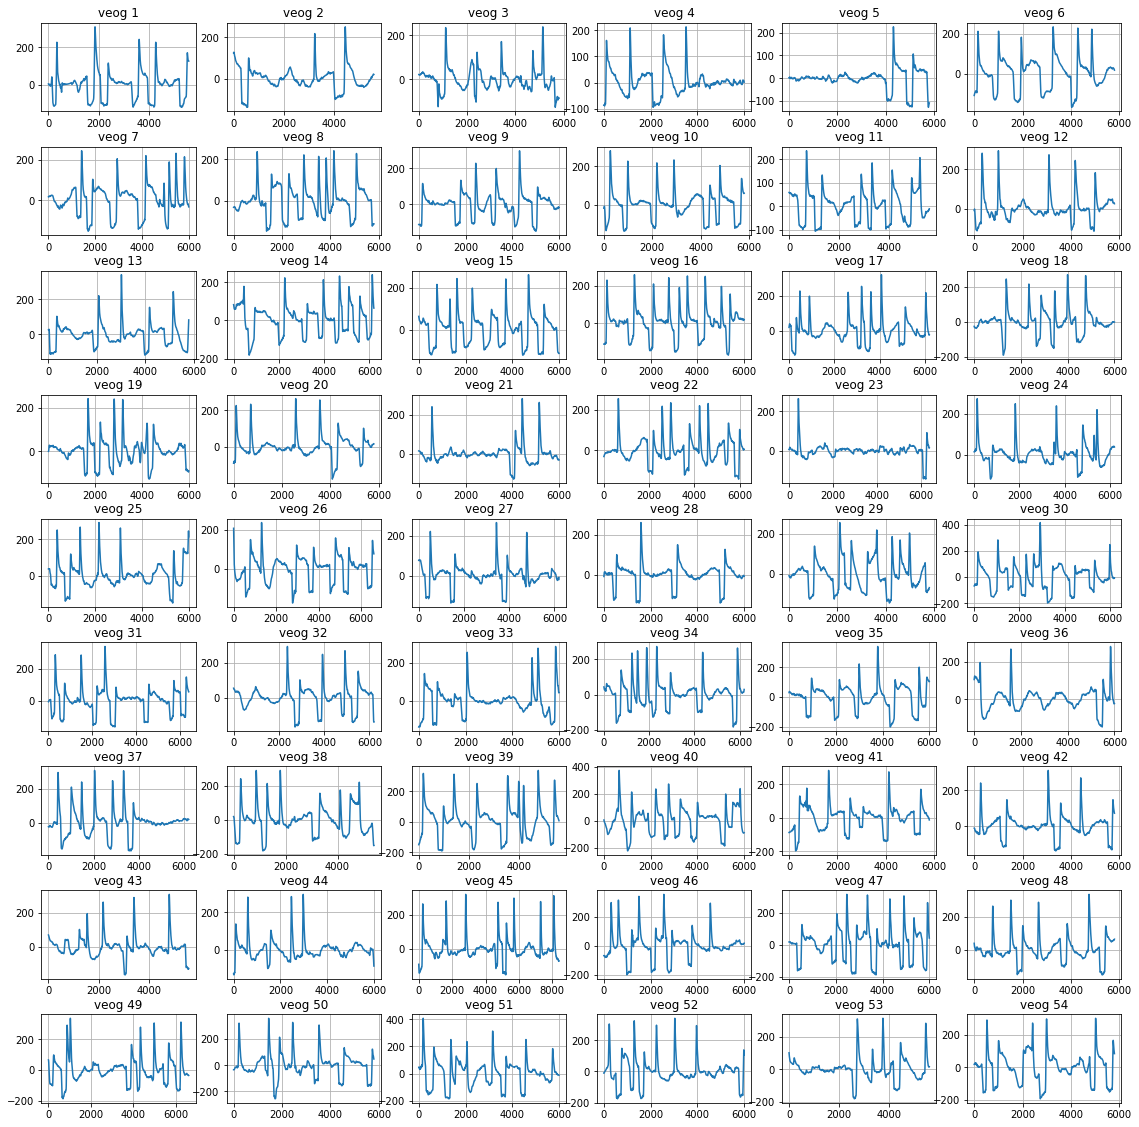

In [89]:
if jupyter:
    veog_dict = loadmat(veog_file)
else:
    veog_dict = loadmat("VEOG.mat?raw=true")

keys = [veog_dict.keys()]
new_veog = RemoveKeys(veog_dict)
print(new_veog.keys())
veog_list = [new_veog[veog] for veog in new_veog.keys()]
v_shapes = [ veog_list[i].shape[1] for i in range(0,len(veog_list))]
print("len veog_list: " + str( len(veog_list) ) )
print("len de veog mas larga: "+str( np.amax(v_shapes) ))
print("len de veog mas corta: "+str( np.amin(v_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(veog_list)):
    AddPlot(veog_list[i][0], 9, 6, i+1, "veog "+str(i+1))
plt.show()

dict_keys(['heog_1', 'heog_2', 'heog_3', 'heog_4', 'heog_5', 'heog_6', 'heog_7', 'heog_8', 'heog_9', 'heog_10', 'heog_11', 'heog_12', 'heog_13', 'heog_14', 'heog_15', 'heog_16', 'heog_17', 'heog_18', 'heog_19', 'heog_20', 'heog_21', 'heog_22', 'heog_23', 'heog_24', 'heog_25', 'heog_26', 'heog_27', 'heog_28', 'heog_29', 'heog_30', 'heog_31', 'heog_32', 'heog_33', 'heog_34', 'heog_35', 'heog_36', 'heog_37', 'heog_38', 'heog_39', 'heog_40', 'heog_41', 'heog_42', 'heog_43', 'heog_44', 'heog_45', 'heog_46', 'heog_47', 'heog_48', 'heog_49', 'heog_50', 'heog_51', 'heog_52', 'heog_53', 'heog_54'])
len heog_list: 54
len de heog mas larga: 8401
len de heog mas corta: 5401


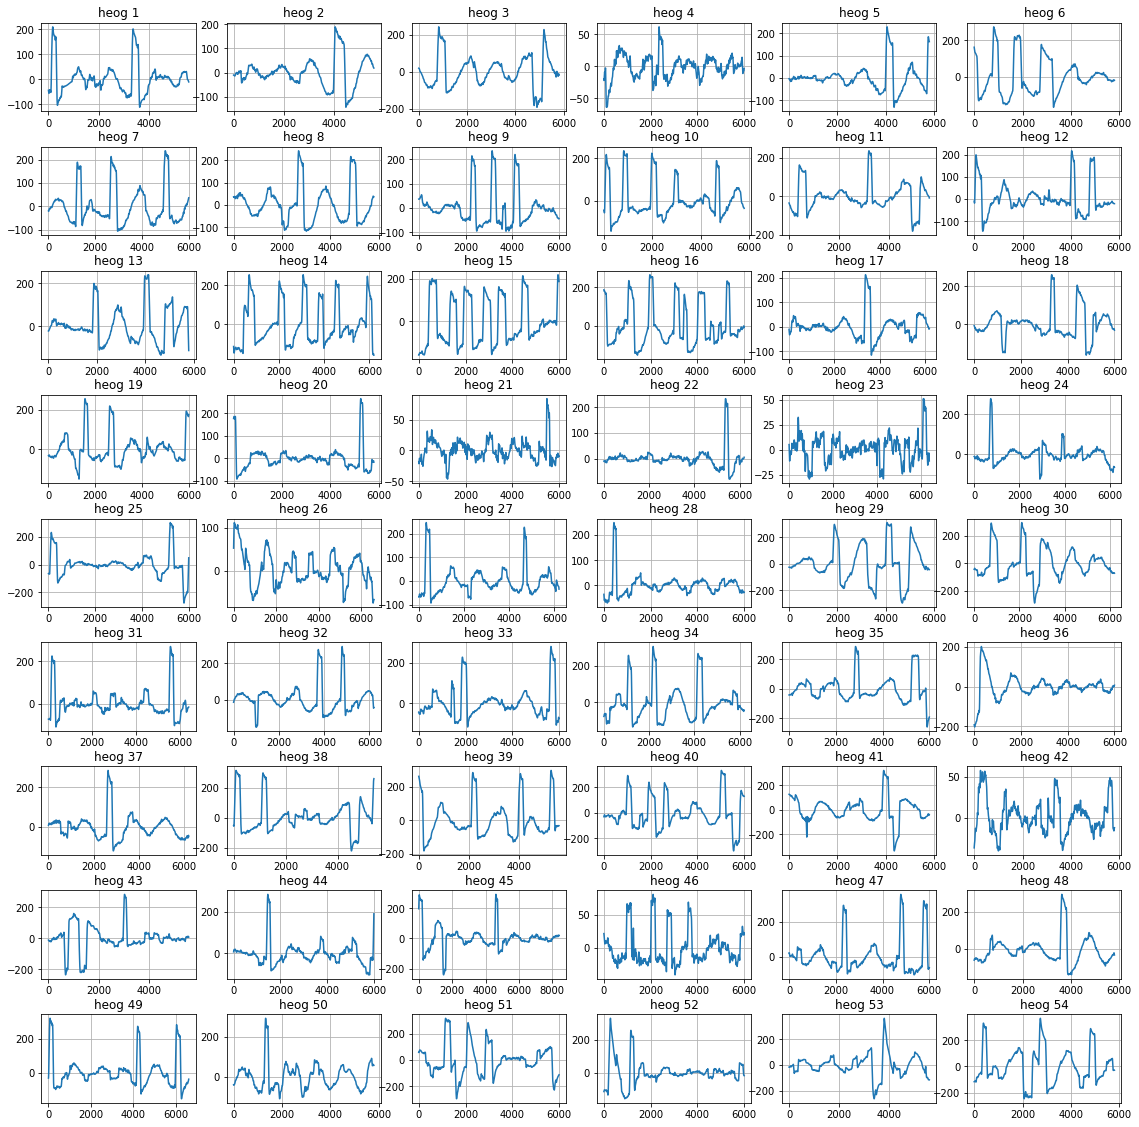

In [90]:
if jupyter:
    heog_dict = loadmat(heog_file)
else:
    heog_dict = loadmat("HEOG.mat?raw=true")

new_heog = RemoveKeys(heog_dict)
print(new_heog.keys())
heog_list = [new_heog[heog] for heog in new_heog.keys()]
h_shapes = [ heog_list[i].shape[1] for i in range(0,len(heog_list))]
print("len heog_list: " + str( len(heog_list) ) )
print("len de heog mas larga: "+str( np.amax(h_shapes) ))
print("len de heog mas corta: "+str( np.amin(h_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(heog_list)):
    AddPlot(heog_list[i][0], 9, 6, i+1, "heog "+str(i+1))
plt.show()

dict_keys(['sim1_con', 'sim2_con', 'sim3_con', 'sim4_con', 'sim5_con', 'sim6_con', 'sim7_con', 'sim8_con', 'sim9_con', 'sim10_con', 'sim11_con', 'sim12_con', 'sim13_con', 'sim14_con', 'sim15_con', 'sim16_con', 'sim17_con', 'sim18_con', 'sim19_con', 'sim20_con', 'sim21_con', 'sim22_con', 'sim23_con', 'sim24_con', 'sim25_con', 'sim26_con', 'sim27_con', 'sim28_con', 'sim29_con', 'sim30_con', 'sim31_con', 'sim32_con', 'sim33_con', 'sim34_con', 'sim35_con', 'sim36_con', 'sim37_con', 'sim38_con', 'sim39_con', 'sim40_con', 'sim41_con', 'sim42_con', 'sim43_con', 'sim44_con', 'sim45_con', 'sim46_con', 'sim47_con', 'sim48_con', 'sim49_con', 'sim50_con', 'sim51_con', 'sim52_con', 'sim53_con', 'sim54_con'])
len cont_list: 54
len de cont mas larga: 8401
len de cont mas corta: 5401


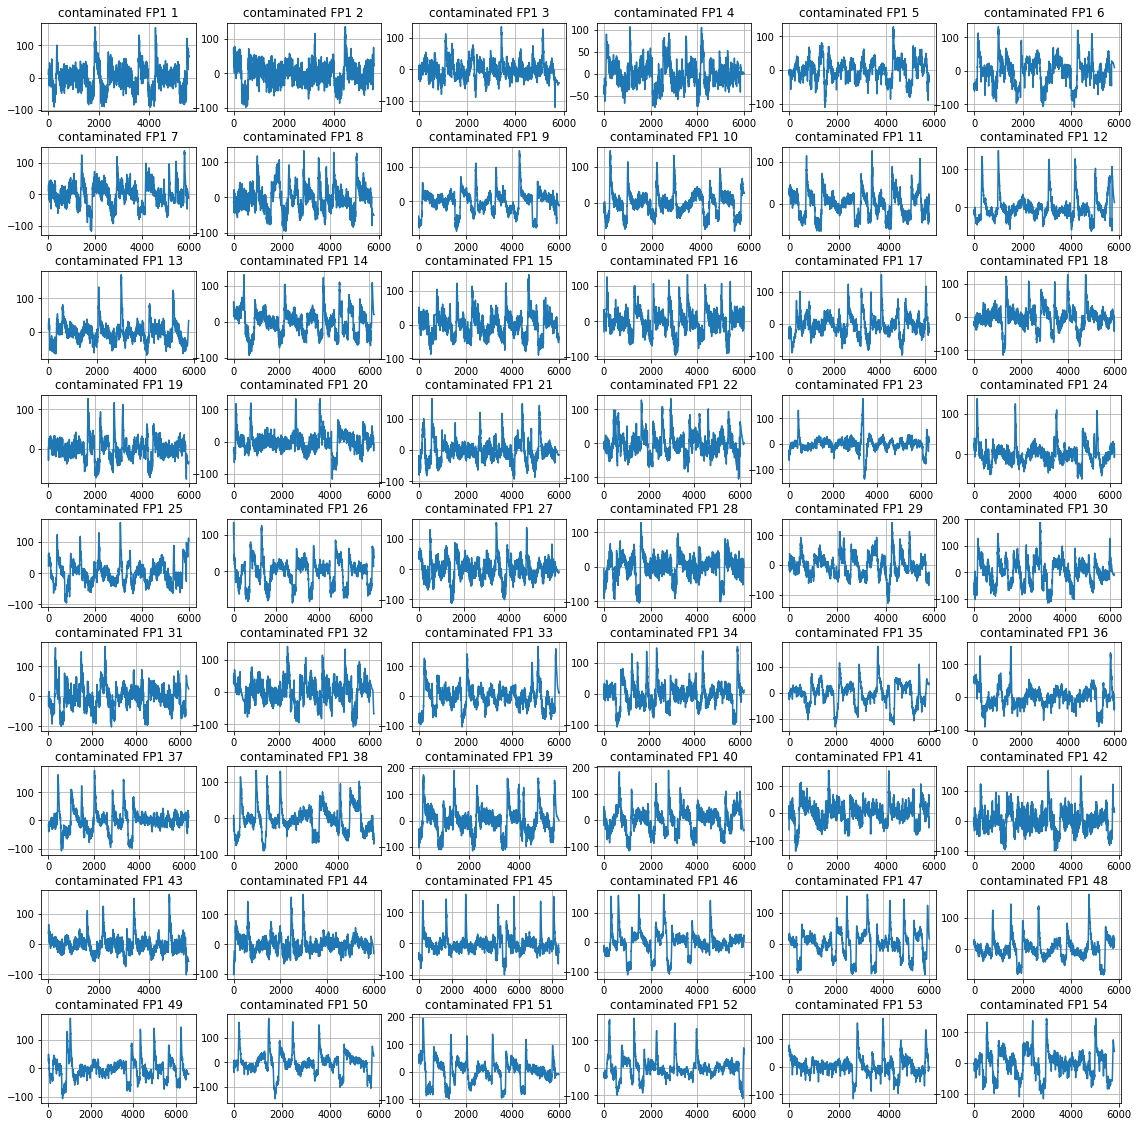

In [91]:
if jupyter:
    cont_data_dict = loadmat(cont_data_file)
else:
    cont_data_dict = loadmat("Contaminated_Data.mat?raw=true")

new_cont_data = RemoveKeys(cont_data_dict)
print(new_cont_data.keys())
cont_data_list = [new_cont_data[cont_data] for cont_data in new_cont_data.keys()]
c_shapes = [ cont_data_list[i].shape[1] for i in range(0,len(cont_data_list))]
print("len cont_list: " + str( len(cont_data_list) ) )
print("len de cont mas larga: "+str( np.amax(c_shapes) ))
print("len de cont mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(cont_data_list)):
    AddPlot(cont_data_list[i][0], 9, 6, i+1, "contaminated FP1 "+str(i+1))
plt.show()

In [94]:
def plot_result(contaminated_signal, clean_signal, filtered_signal):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Estimation vs Contaminated EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(contaminated_signal, label='Contaminated')
    plt.legend()
    plt.show()

    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Filtered vs Clean EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(clean_signal, label='Clean')
    plt.legend()
    plt.show()

In [95]:
class FilterRLS():    
    def __init__(self, m, delta, lamda):
        self.m = m
        self.delta = delta
        self.lamda = lamda
        self.p = np.identity(m)/delta
        self.w = np.zeros(m)
        self.inputs = np.zeros(m)

    def adapt(self, e):
        # Calculate k
        aux = np.matmul(np.transpose(self.inputs),self.p)
        k = np.matmul(self.p,self.inputs)/(self.lamda+np.matmul(aux,self.inputs))
        # Calculate P
        self.p = self.p/self.lamda - (k*self.inputs.T*self.p)/self.lamda 
        # Actualize w
        self.w += k * e      

    def filter_sample(self, x):
        shifted = shift(self.inputs, 1, cval=0)
        shifted[0] = x
        self.inputs = shifted
        return np.dot(self.w, self.inputs)

def FilterEOG(h_filter, v_filter, v_sample, h_sample, eeg_sample):
    # Calculate outputs
    veog_out = v_filter.filter_sample(v_sample)
    heog_out = h_filter.filter_sample(h_sample)
    # Estimate EEG
    clean_sample = eeg_sample - veog_out - heog_out
    return clean_sample

In [96]:
# Eleccion del modelo
selected_delta = 0.01
selected_lamda = 0.9999
M = 2
filter1 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)

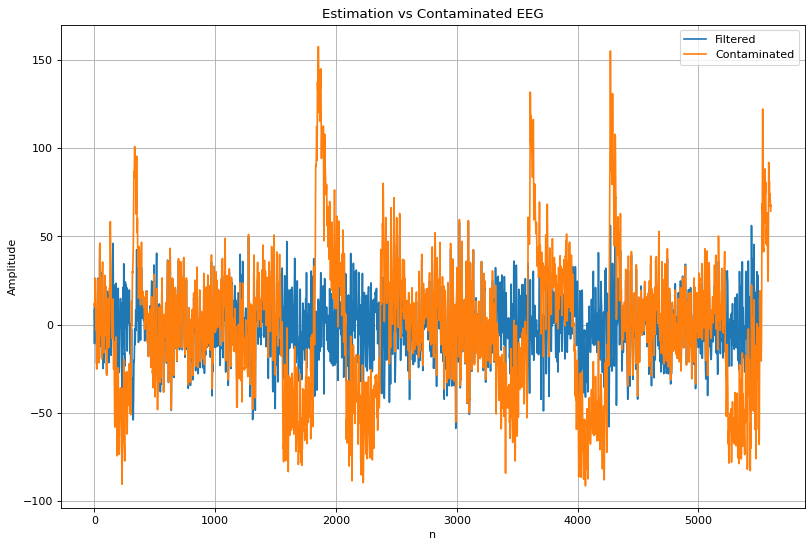

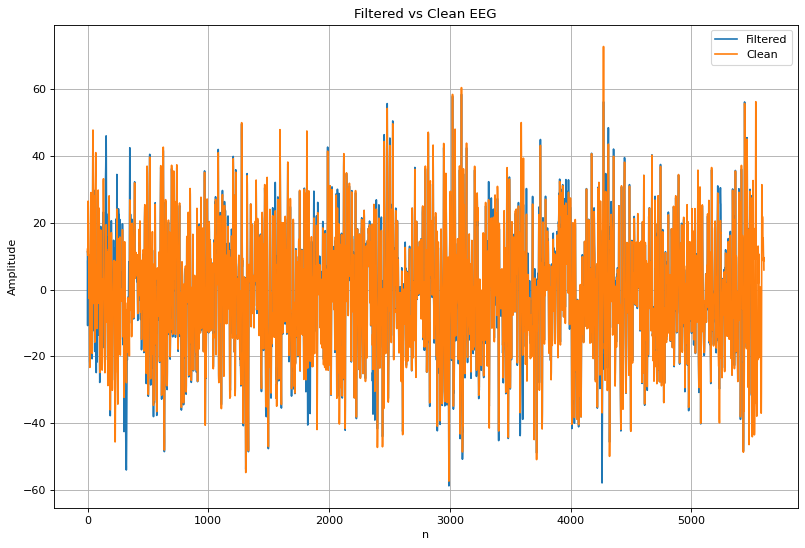

In [97]:
contaminated_signal = cont_data_list[0][0].astype(np.float64)
veog_signal = veog_list[0][0].astype(np.float64)
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

#print(veog_signal.var())
#print(heog_signal.var())

clean_estimation = np.zeros(len(contaminated_signal))

for i in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[i]
    heog_sample = heog_signal[i]
    eeg_sample = contaminated_signal[i]

    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[i] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[i])
    filter2.adapt( e=clean_estimation[i])

plot_result(contaminated_signal, desired_signal, clean_estimation)

KeyboardInterrupt: 

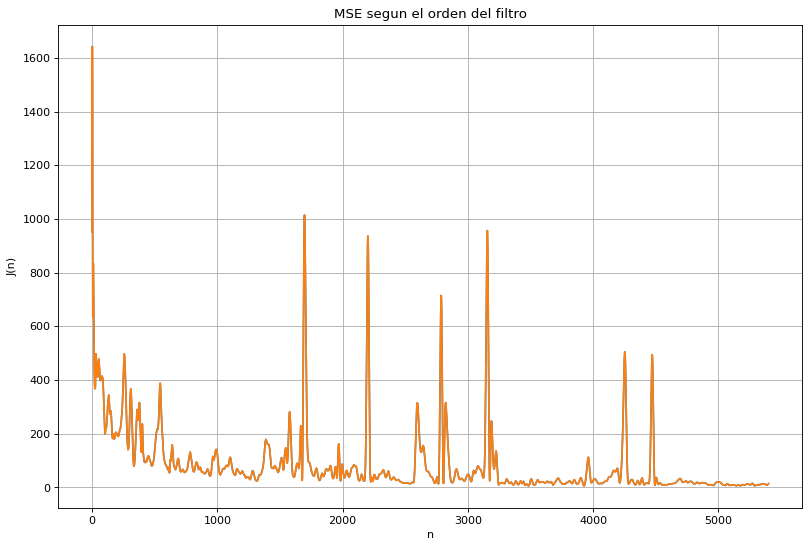

In [77]:
# Eleccion del modelo
selected_delta = 0.01 # 0.56
selected_lamda = 0.9999

M_values = np.linspace(start=1,stop=3, num=3, dtype = int)
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(M_values),5401))


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J(n)')
plt.xlabel('n')
plt.title('MSE segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
  M_test = M_values[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
    filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(j_list[j], label="M="+str(M_test))
plt.legend()
plt.show()

In [ ]:
selected_mu = 3e-7
M = 1

plt.figure(num=None, figsize=(12,8), dpi=80,facecolor='w', edgecolor='k')
plt.ylabel('Js(n)')
plt.xlabel('n')
plt.title('Js de distintas realizaciones (LMS)')
plt.grid('on')
plt.ylim(top=2000)

for i in range(0, 8):
  contaminated_signal = cont_data_list[i][0].astype(np.float64)
  veog_signal = veog_list[i][0].astype(np.float64)
  heog_signal = heog_list[i][0].astype(np.float64)
  desired_signal = clean_list[i][0].astype(np.float64)
  clean_estimation = np.zeros(len(contaminated_signal))
  filter1 = FilterLMS(m=M, mu=selected_mu)
  filter2 = FilterLMS(m=M, mu=selected_mu)

  for k in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[k]
    heog_sample = heog_signal[k]
    eeg_sample = contaminated_signal[k]
    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[k] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[k])
    filter2.adapt( e=clean_estimation[k])
  plt.plot( (desired_signal[:5401] - clean_estimation[:5401])**2 )

plt.show()

In [ ]:
#Mediciones
contaminated_signal = cont_data_list[0][0].astype(np.float64) 
veog_signal = veog_list[0][0].astype(np.float64) 
heog_signal = heog_list[0][0].astype(np.float64)
desired_signal = clean_list[0][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))
#Parametros
selected_mu = 3e-7
M = 1
w_v = np.zeros((len(contaminated_signal),M))
w_h = np.zeros((len(contaminated_signal),M))

filter1 = FilterLMS(m=M, mu=selected_mu)
filter2 = FilterLMS(m=M, mu=selected_mu)
for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w_v[k] = filter1.w
  w_h[k] = filter2.w

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[k] =   eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[k])
  filter2.adapt( e=clean_estimation[k])

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking VEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_v[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking HEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_h[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()